In [1]:
import importlib
import time
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [11]:
dimension = 2**9
print(dimension)
rho0 = 0.1
dx = 1/dimension

H = np.eye(dimension)[::2]
obs_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

512


In [16]:
eig_val, eig_vec, P, sort_ind = covariance.generate_circulant(
    dimension, dx, rho0, covariance.fft_sqd_exp_1d,
    return_Corr=True,
    return_sort_ind=True)
R = np.eye(obs_size)

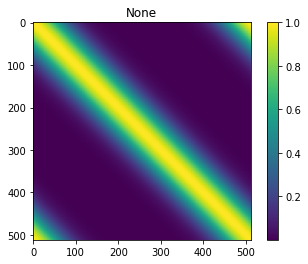

In [17]:
imshow(P)

In [18]:
trans_mats = assimilate.transformation_matrices(
    H, P=P,
    R=R, return_Ts=True)

for key, val in trans_mats.items():
    print(key)
    exec(key + '=val')

P_sqrt
P_inv_sqrt
R_sqrt
R_inv_sqrt
U
S
VT
H
Tx
Tx_inv
Ty
Ty_inv


In [34]:
def angle(V0, V1):
    IPs = V0.T @ V1
    norm0 = (V0 ** 2).sum(axis=0)
    norm1 = (V1 ** 2).sum(axis=0)
    norm0 = norm0[:, None]
    norm1 = norm1[None, :]
    sigmas = sp.linalg.svd(
        IPs / np.sqrt(norm0 * norm1),
        compute_uv=False)
    dist = np.arccos(sigmas.min())
    return dist


def angle_2(V0, V1):
    norm0 = sp.linalg.norm(V0, ord=2, axis=0)
    norm1 = sp.linalg.norm(V1, ord=2, axis=0)
    V0 = V0/norm0
    V1 = V1/norm1
    IPs = V0.T @ V1
    sigmas = sp.linalg.svd(
        IPs,
        compute_uv=False)
    dist = np.arccos(sigmas)
    dist = dist.mean()
    return dist

In [49]:
ens_ens_size = 20
ens_size = 10
mu = np.zeros(dimension)
ensemble_array = np.ones(
    [dimension, ens_size, ens_ens_size,
    ]) * np.nan
for t_num in range(ens_ens_size):
    ensemble_array[:, :, t_num] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats['P_sqrt']))

In [50]:
P_sample_array = np.zeros([dimension, dimension, ens_ens_size])
for ens_ens_num in range(ens_ens_size):
    P_sample_array[:, :, ens_ens_num] = np.cov(ensemble_array[:, :, ens_ens_num])

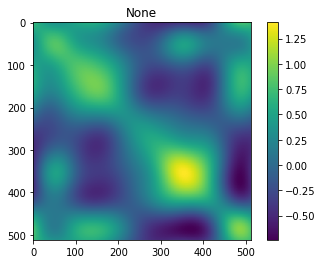

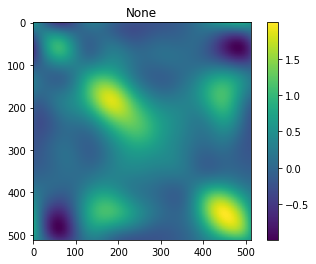

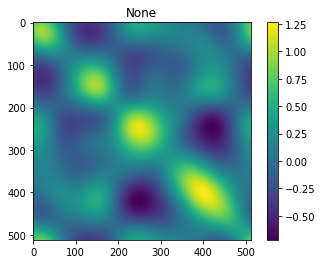

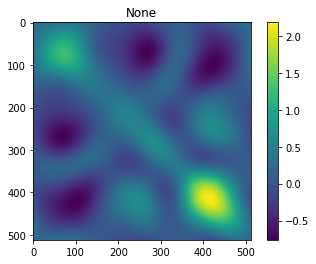

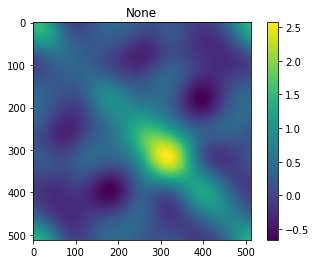

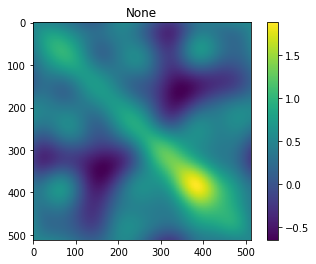

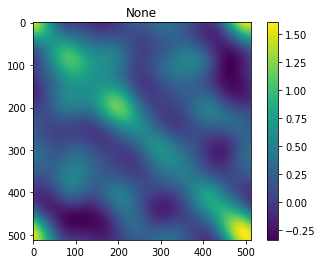

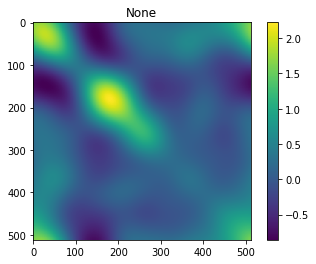

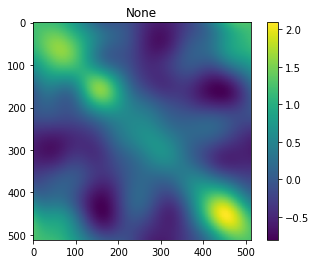

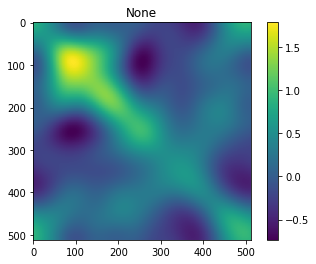

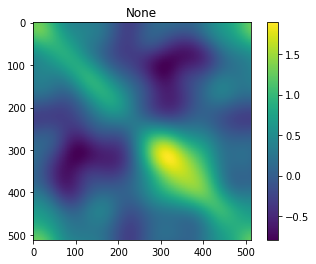

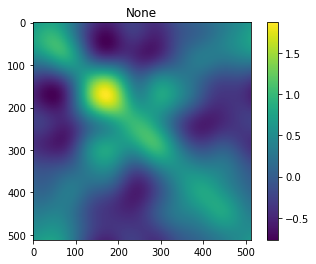

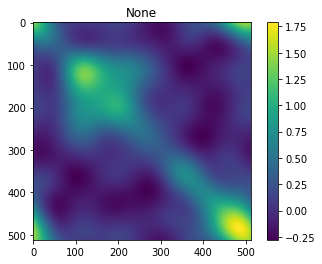

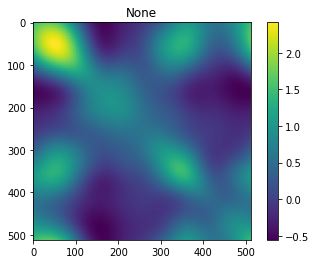

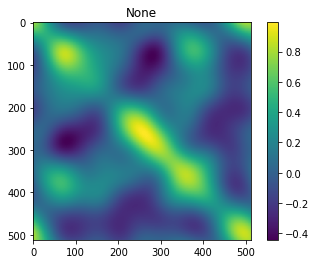

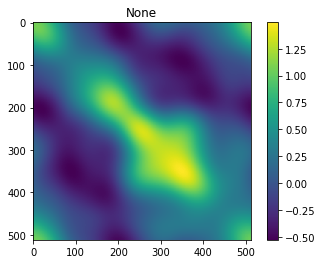

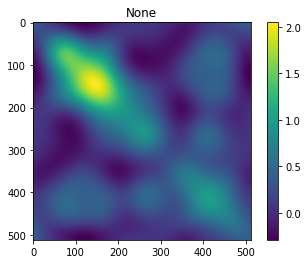

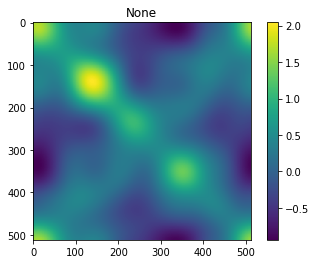

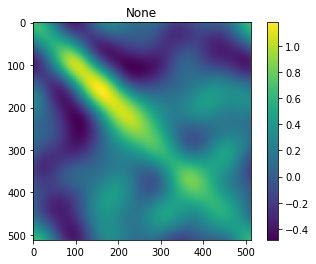

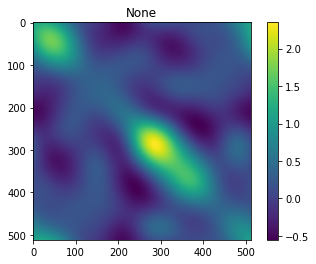

In [51]:
for ens_ens_num in range(ens_ens_size):
    imshow(P_sample_array[:, :, ens_ens_num])

In [52]:
sig_array = np.concatenate(
    [[1], np.repeat([2], 15)])
total_sig = sig_array.sum()
s_array = np.ones([total_sig, ens_ens_size]) * np.nan
U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

In [53]:
for ens_count in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H, P=P_sample_array[:, :, ens_count],
        R=R)

    aU = this_trans_mats['U']
    aS = this_trans_mats['S']
    aVT = this_trans_mats['VT']

    U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
    s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
    V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

In [54]:
angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
last_sig = 0
for sig_count, sig_num in enumerate(sig_array):
    sig_slice = slice(last_sig, last_sig + sig_num)
    print('')
    print(sig_slice)
    last_sig = last_sig + sig_num
    true_V = VT[sig_slice].T

    comb_count = 0
    for ens_count in range(ens_ens_size):
        aV = V_array[:, sig_slice, ens_count]
        angle_array[sig_count, ens_count] = angle(aV, true_V)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)

slice(9, 11, None)

slice(11, 13, None)

slice(13, 15, None)

slice(15, 17, None)

slice(17, 19, None)

slice(19, 21, None)

slice(21, 23, None)

slice(23, 25, None)

slice(25, 27, None)

slice(27, 29, None)

slice(29, 31, None)


Text(0.5,1,'For Ensemble size: 10')

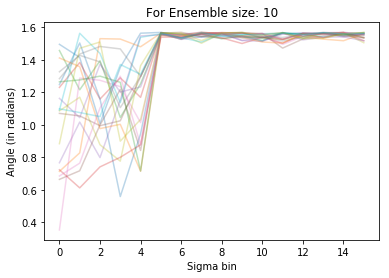

In [56]:
plt.figure()
plt.plot(angle_array, alpha=0.3)
plt.xlabel('Sigma bin')
plt.ylabel('Angle (in radians)')
plt.title(f'For Ensemble size: {ens_size}')

In [57]:
ens_ens_size = 20
ens_size = 20
mu = np.zeros(dimension)
ensemble_array = np.ones(
    [dimension, ens_size, ens_ens_size,
    ]) * np.nan
for t_num in range(ens_ens_size):
    ensemble_array[:, :, t_num] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats['P_sqrt']))

In [58]:
P_sample_array = np.zeros([dimension, dimension, ens_ens_size])
for ens_ens_num in range(ens_ens_size):
    P_sample_array[:, :, ens_ens_num] = np.cov(ensemble_array[:, :, ens_ens_num])

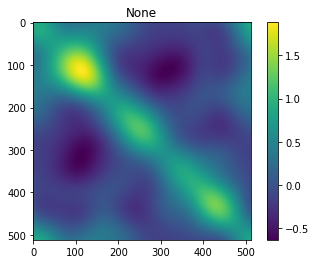

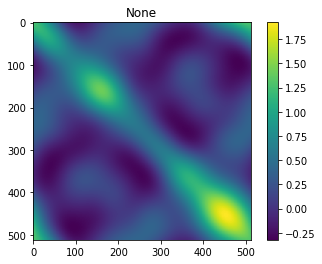

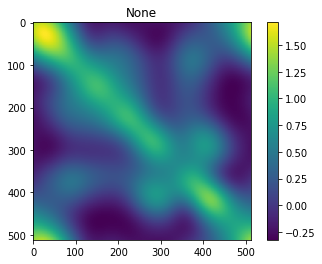

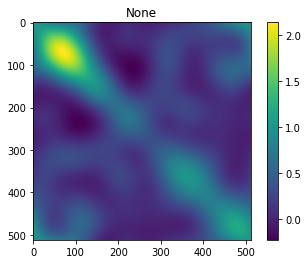

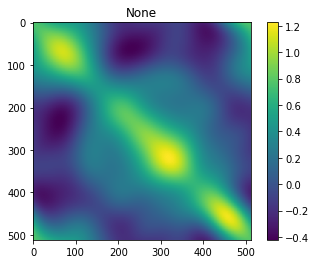

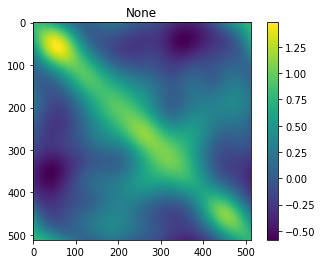

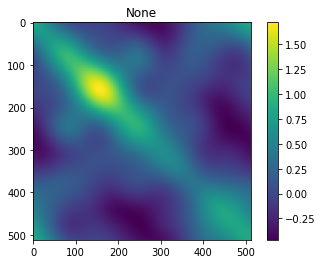

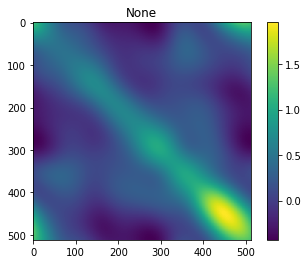

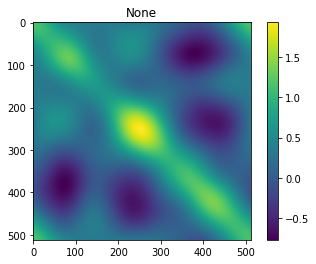

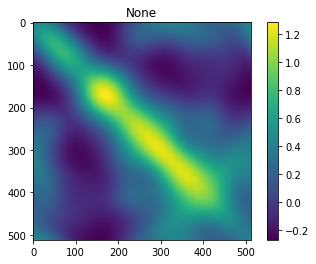

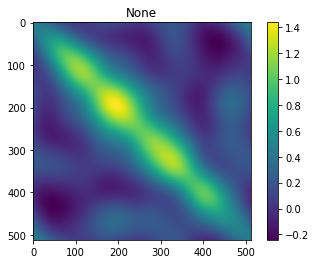

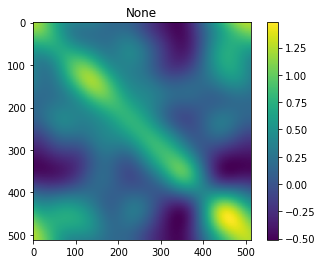

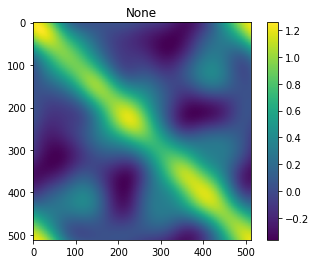

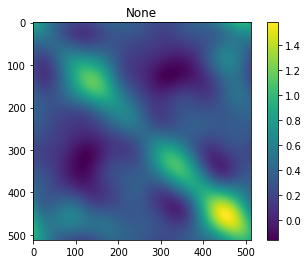

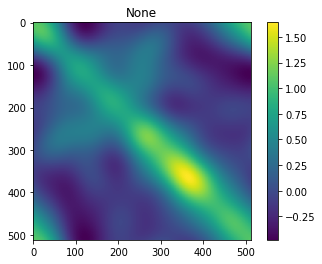

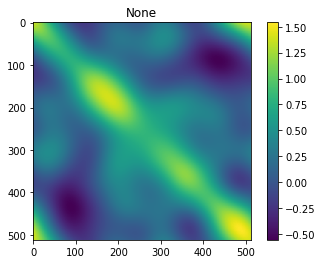

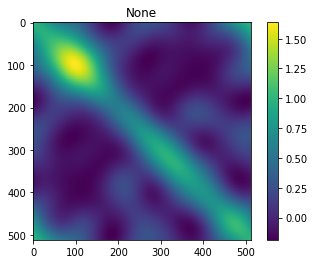

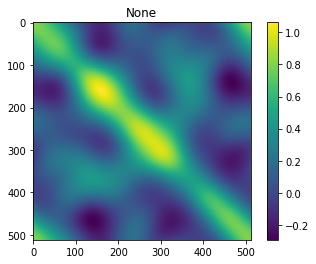

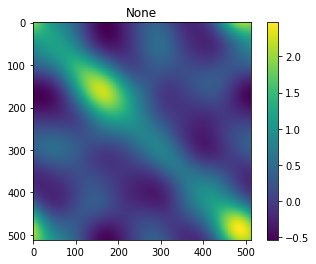

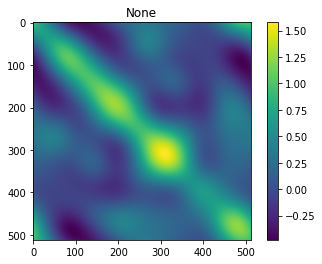

In [59]:
for ens_ens_num in range(ens_ens_size):
    imshow(P_sample_array[:, :, ens_ens_num])

In [60]:
sig_array = np.concatenate(
    [[1], np.repeat([2], 15)])
total_sig = sig_array.sum()
s_array = np.ones([total_sig, ens_ens_size]) * np.nan
U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

In [61]:
for ens_count in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H, P=P_sample_array[:, :, ens_count],
        R=R)

    aU = this_trans_mats['U']
    aS = this_trans_mats['S']
    aVT = this_trans_mats['VT']

    U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
    s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
    V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

In [62]:
angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
last_sig = 0
for sig_count, sig_num in enumerate(sig_array):
    sig_slice = slice(last_sig, last_sig + sig_num)
    print('')
    print(sig_slice)
    last_sig = last_sig + sig_num
    true_V = VT[sig_slice].T

    comb_count = 0
    for ens_count in range(ens_ens_size):
        aV = V_array[:, sig_slice, ens_count]
        angle_array[sig_count, ens_count] = angle(aV, true_V)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)

slice(9, 11, None)

slice(11, 13, None)

slice(13, 15, None)

slice(15, 17, None)

slice(17, 19, None)

slice(19, 21, None)

slice(21, 23, None)

slice(23, 25, None)

slice(25, 27, None)

slice(27, 29, None)

slice(29, 31, None)


Text(0.5,1,'For Ensemble size: 20')

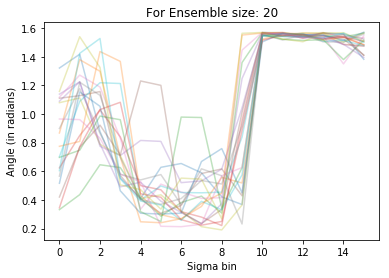

In [63]:
plt.figure()
plt.plot(angle_array, alpha=0.3)
plt.xlabel('Sigma bin')
plt.ylabel('Angle (in radians)')
plt.title(f'For Ensemble size: {ens_size}')

In [64]:
ens_ens_size = 20
ens_size = 40
mu = np.zeros(dimension)
ensemble_array = np.ones(
    [dimension, ens_size, ens_ens_size,
    ]) * np.nan
for t_num in range(ens_ens_size):
    ensemble_array[:, :, t_num] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats['P_sqrt']))

In [65]:
P_sample_array = np.zeros([dimension, dimension, ens_ens_size])
for ens_ens_num in range(ens_ens_size):
    P_sample_array[:, :, ens_ens_num] = np.cov(ensemble_array[:, :, ens_ens_num])

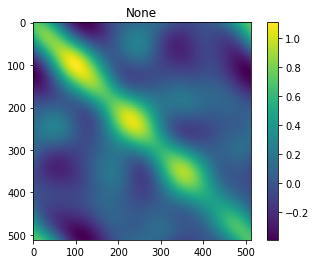

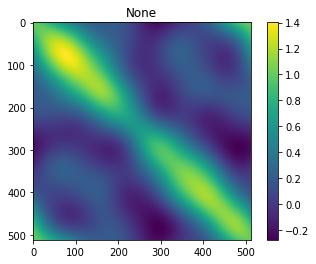

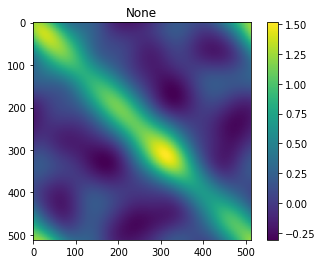

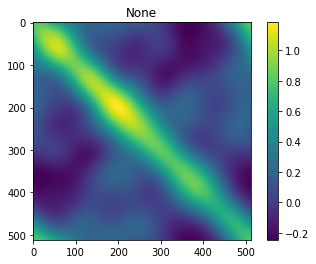

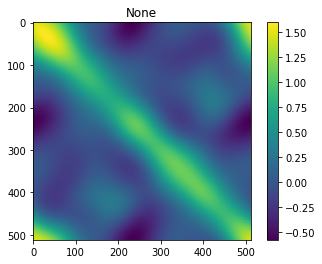

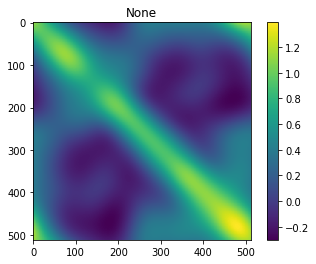

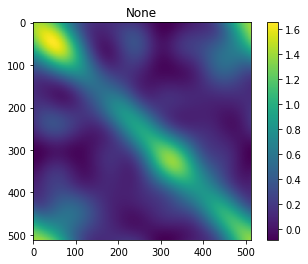

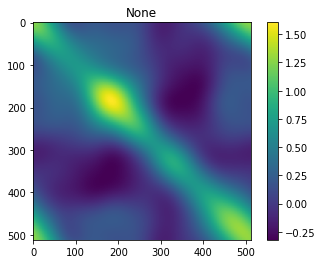

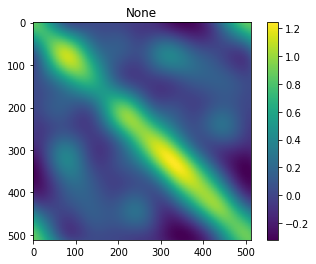

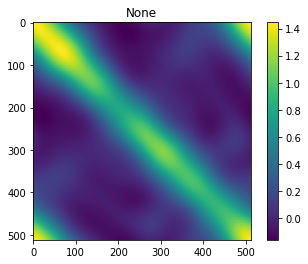

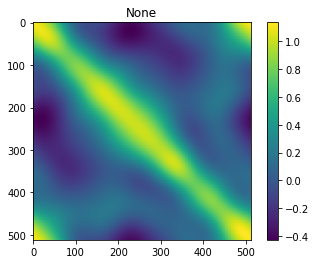

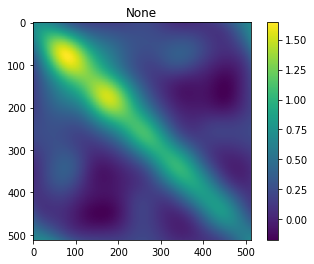

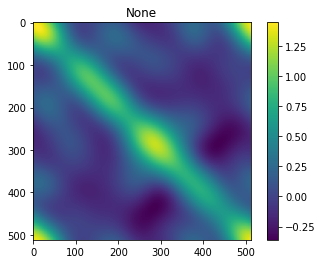

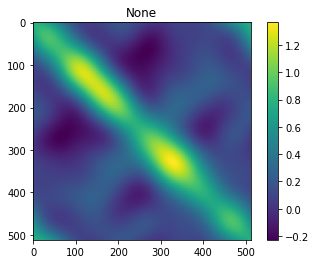

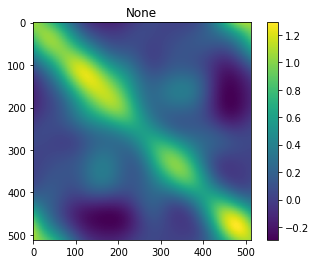

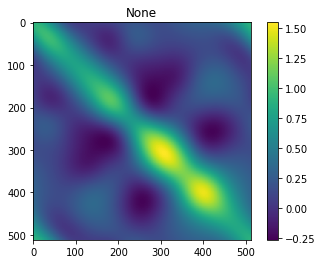

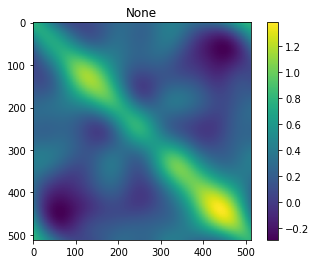

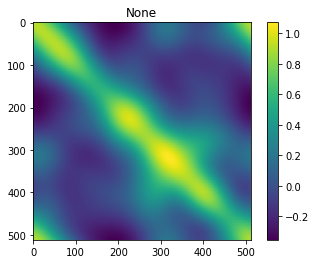

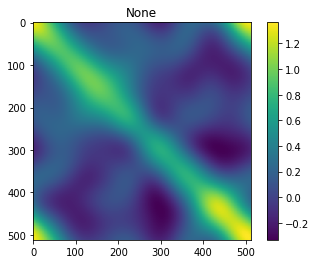

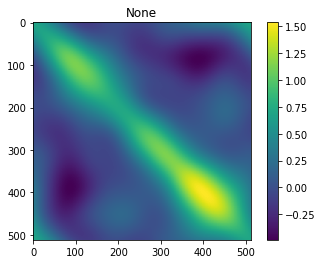

In [66]:
for ens_ens_num in range(ens_ens_size):
    imshow(P_sample_array[:, :, ens_ens_num])

In [67]:
sig_array = np.concatenate(
    [[1], np.repeat([2], 15)])
total_sig = sig_array.sum()
s_array = np.ones([total_sig, ens_ens_size]) * np.nan
U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

In [68]:
for ens_count in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H, P=P_sample_array[:, :, ens_count],
        R=R)

    aU = this_trans_mats['U']
    aS = this_trans_mats['S']
    aVT = this_trans_mats['VT']

    U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
    s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
    V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

In [69]:
angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
last_sig = 0
for sig_count, sig_num in enumerate(sig_array):
    sig_slice = slice(last_sig, last_sig + sig_num)
    print('')
    print(sig_slice)
    last_sig = last_sig + sig_num
    true_V = VT[sig_slice].T

    comb_count = 0
    for ens_count in range(ens_ens_size):
        aV = V_array[:, sig_slice, ens_count]
        angle_array[sig_count, ens_count] = angle(aV, true_V)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)

slice(9, 11, None)

slice(11, 13, None)

slice(13, 15, None)

slice(15, 17, None)

slice(17, 19, None)

slice(19, 21, None)

slice(21, 23, None)

slice(23, 25, None)

slice(25, 27, None)

slice(27, 29, None)

slice(29, 31, None)


Text(0.5,1,'For Ensemble size: 40')

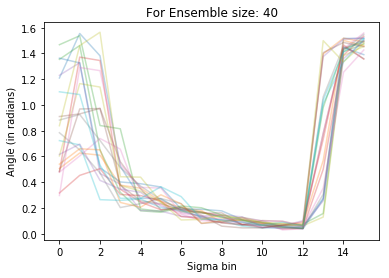

In [70]:
plt.figure()
plt.plot(angle_array, alpha=0.3)
plt.xlabel('Sigma bin')
plt.ylabel('Angle (in radians)')
plt.title(f'For Ensemble size: {ens_size}')

In [71]:
ens_ens_size = 20
ens_size = 1000
mu = np.zeros(dimension)
ensemble_array = np.ones(
    [dimension, ens_size, ens_ens_size,
    ]) * np.nan
for t_num in range(ens_ens_size):
    ensemble_array[:, :, t_num] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats['P_sqrt']))

In [72]:
P_sample_array = np.zeros([dimension, dimension, ens_ens_size])
for ens_ens_num in range(ens_ens_size):
    P_sample_array[:, :, ens_ens_num] = np.cov(ensemble_array[:, :, ens_ens_num])

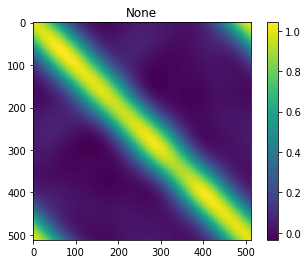

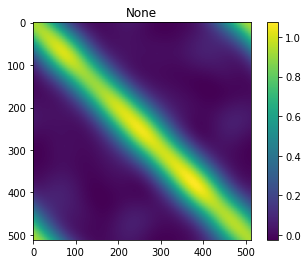

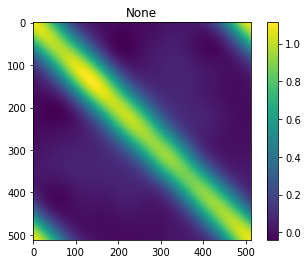

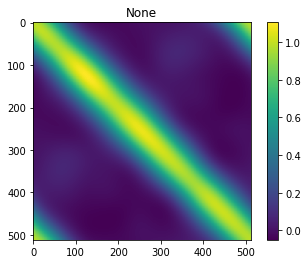

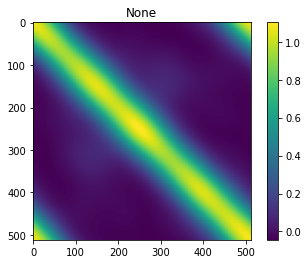

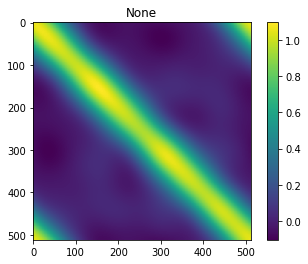

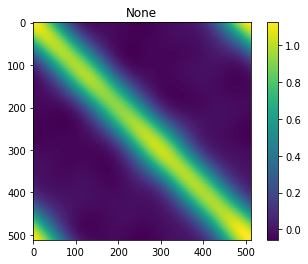

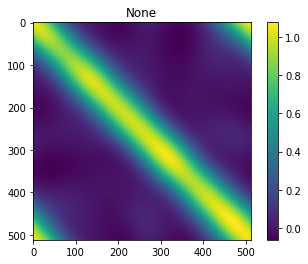

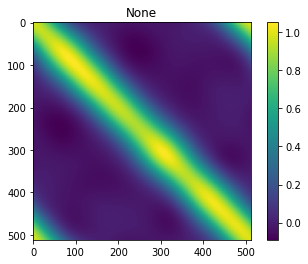

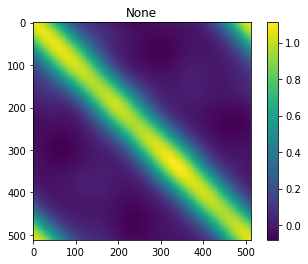

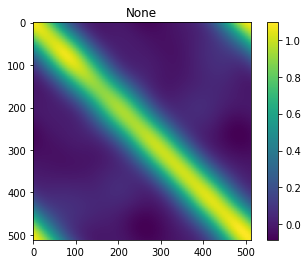

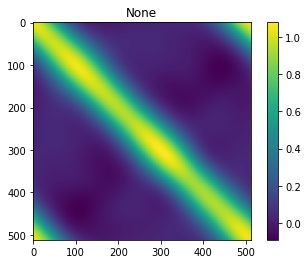

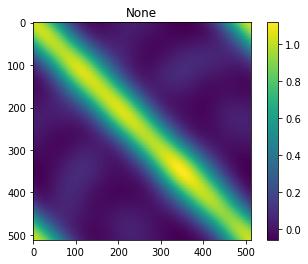

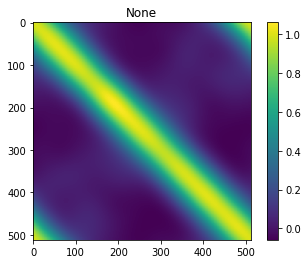

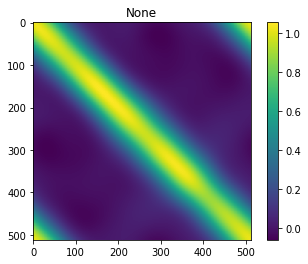

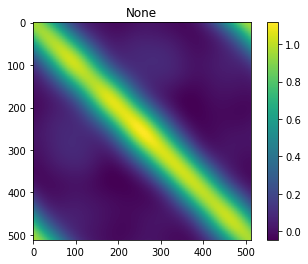

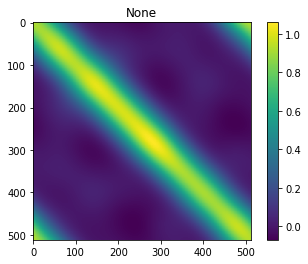

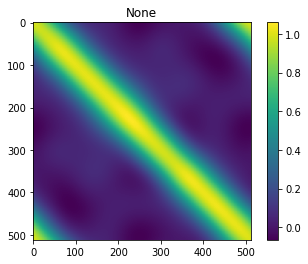

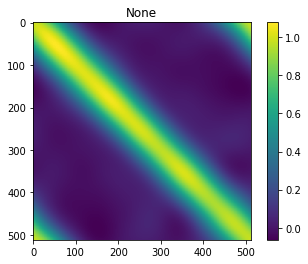

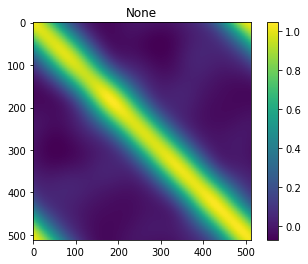

In [73]:
for ens_ens_num in range(ens_ens_size):
    imshow(P_sample_array[:, :, ens_ens_num])

In [74]:
sig_array = np.concatenate(
    [[1], np.repeat([2], 15)])
total_sig = sig_array.sum()
s_array = np.ones([total_sig, ens_ens_size]) * np.nan
U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

In [75]:
for ens_count in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H, P=P_sample_array[:, :, ens_count],
        R=R)

    aU = this_trans_mats['U']
    aS = this_trans_mats['S']
    aVT = this_trans_mats['VT']

    U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
    s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
    V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

In [76]:
angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
last_sig = 0
for sig_count, sig_num in enumerate(sig_array):
    sig_slice = slice(last_sig, last_sig + sig_num)
    print('')
    print(sig_slice)
    last_sig = last_sig + sig_num
    true_V = VT[sig_slice].T

    comb_count = 0
    for ens_count in range(ens_ens_size):
        aV = V_array[:, sig_slice, ens_count]
        angle_array[sig_count, ens_count] = angle(aV, true_V)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)

slice(9, 11, None)

slice(11, 13, None)

slice(13, 15, None)

slice(15, 17, None)

slice(17, 19, None)

slice(19, 21, None)

slice(21, 23, None)

slice(23, 25, None)

slice(25, 27, None)

slice(27, 29, None)

slice(29, 31, None)


Text(0.5,1,'For Ensemble size: 1000')

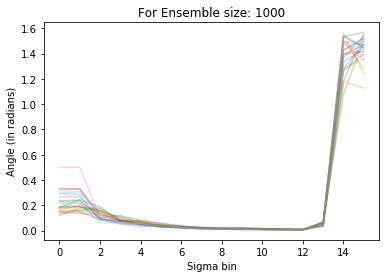

In [77]:
plt.figure()
plt.plot(angle_array, alpha=0.3)
plt.xlabel('Sigma bin')
plt.ylabel('Angle (in radians)')
plt.title(f'For Ensemble size: {ens_size}')

In [97]:
ens_ens_size = 20
ens_size = 40
mu = np.zeros(dimension)
ensemble_array = np.ones(
    [dimension, ens_size, ens_ens_size,
    ]) * np.nan
for t_num in range(ens_ens_size):
    ensemble_array[:, :, t_num] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats['P_sqrt']))

In [98]:
P_sample_array = np.zeros([dimension, dimension, ens_ens_size])
for ens_ens_num in range(ens_ens_size):
    P_sample_array[:, :, ens_ens_num] = np.cov(ensemble_array[:, :, ens_ens_num])

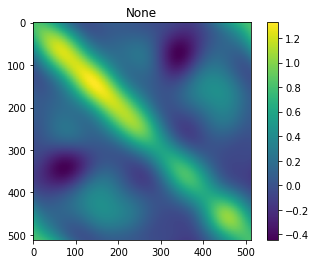

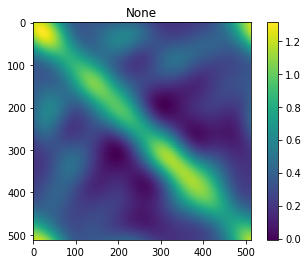

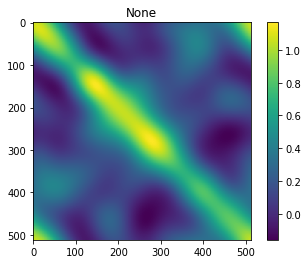

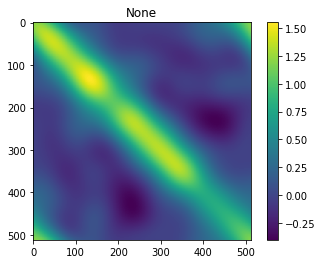

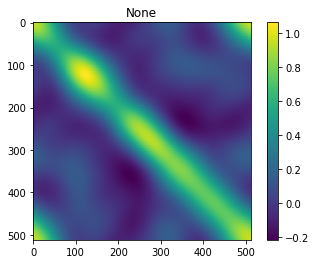

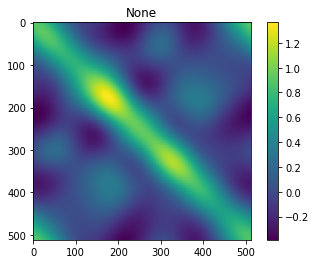

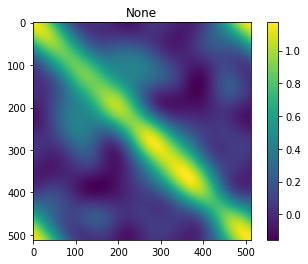

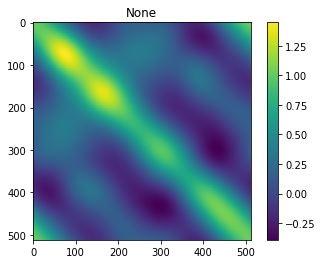

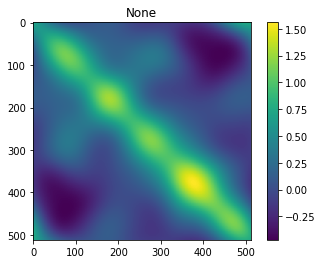

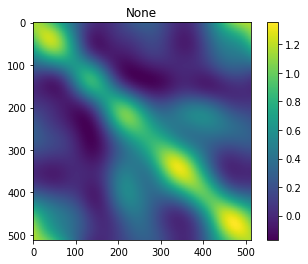

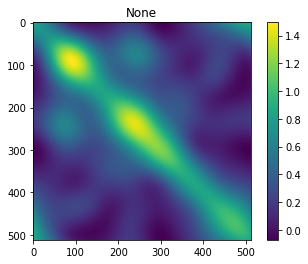

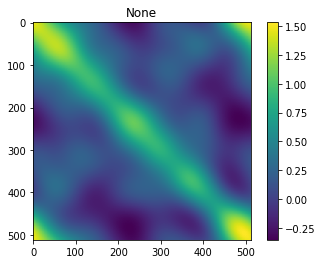

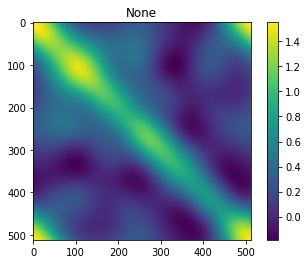

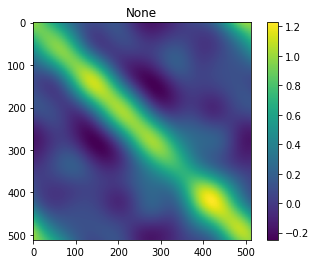

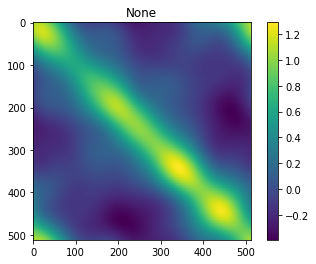

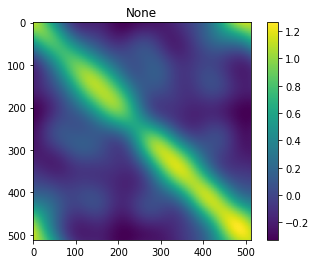

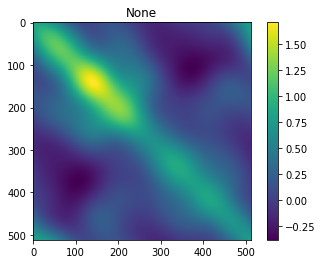

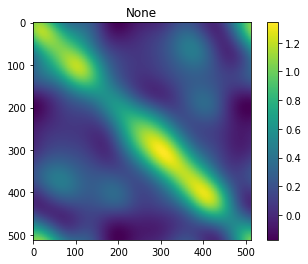

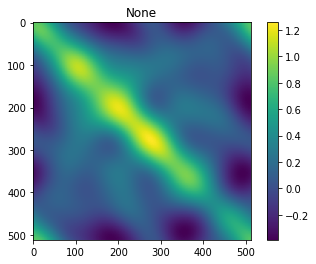

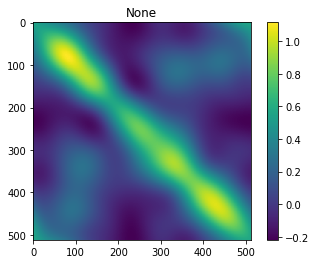

In [99]:
for ens_ens_num in range(ens_ens_size):
    imshow(P_sample_array[:, :, ens_ens_num])

In [100]:
sig_array = np.concatenate(
    [[1], np.repeat([2], 15)])
total_sig = sig_array.sum()
s_array = np.ones([total_sig, ens_ens_size]) * np.nan
U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

In [101]:
for ens_count in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H, P=P_sample_array[:, :, ens_count],
        R=R)

    aU = this_trans_mats['U']
    aS = this_trans_mats['S']
    aVT = this_trans_mats['VT']

    U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
    s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
    V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

In [102]:
angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
last_sig = 0
for sig_count, sig_num in enumerate(sig_array):
    sig_slice = slice(last_sig, last_sig + sig_num)
    print('')
    print(sig_slice)
    last_sig = last_sig + sig_num
    true_V = VT[sig_slice].T

    comb_count = 0
    for ens_count in range(ens_ens_size):
        aV = V_array[:, sig_slice, ens_count]
        angle_array[sig_count, ens_count] = angle(aV, true_V)


slice(0, 1, None)

slice(1, 3, None)

slice(3, 5, None)

slice(5, 7, None)

slice(7, 9, None)

slice(9, 11, None)

slice(11, 13, None)

slice(13, 15, None)

slice(15, 17, None)

slice(17, 19, None)

slice(19, 21, None)

slice(21, 23, None)

slice(23, 25, None)

slice(25, 27, None)

slice(27, 29, None)

slice(29, 31, None)


Text(0.5,1,'For Ensemble size: 40')

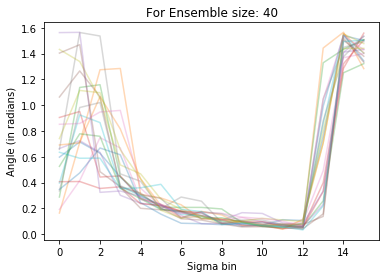

In [103]:
plt.figure()
plt.plot(angle_array, alpha=0.3)
plt.xlabel('Sigma bin')
plt.ylabel('Angle (in radians)')
plt.title(f'For Ensemble size: {ens_size}')

/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


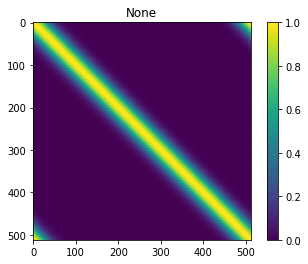

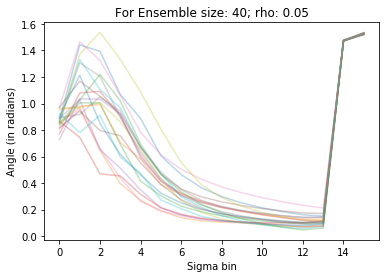

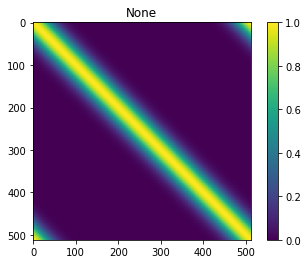

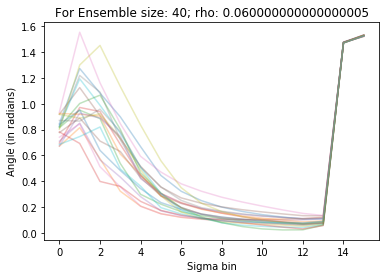

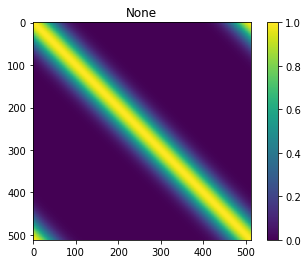

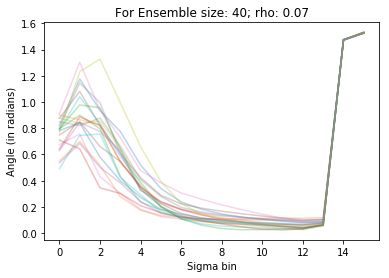

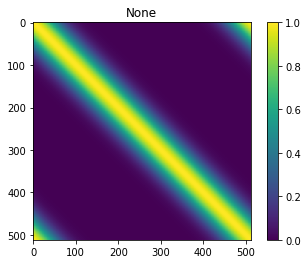

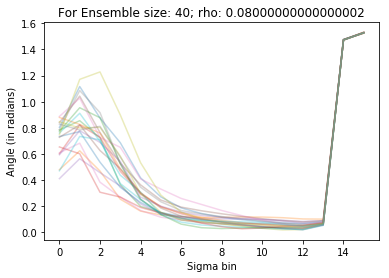

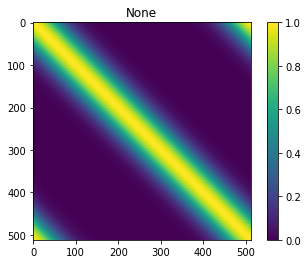

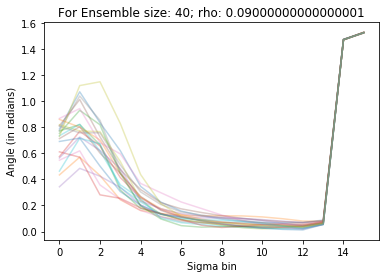

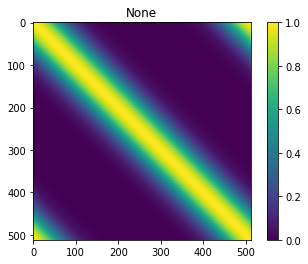

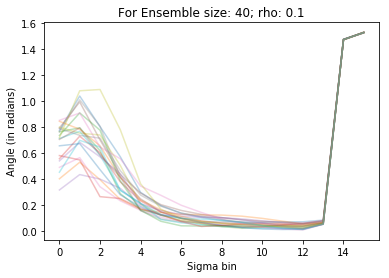

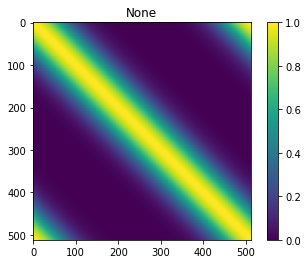

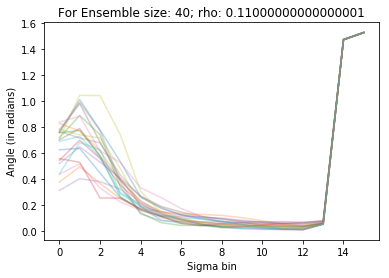

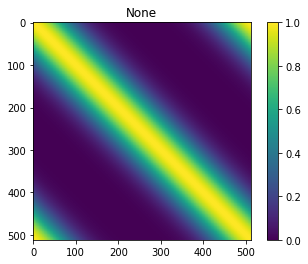

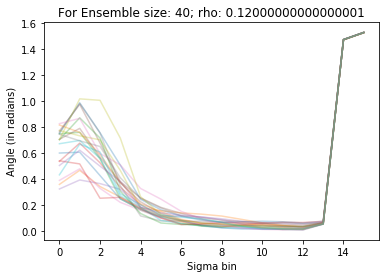

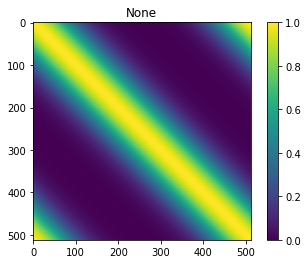

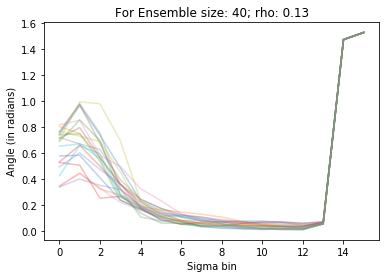

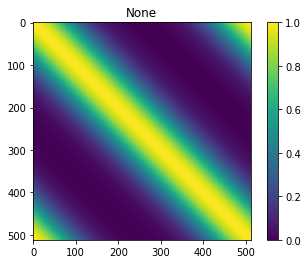

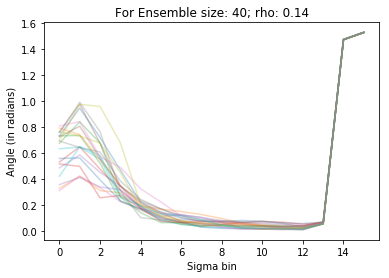

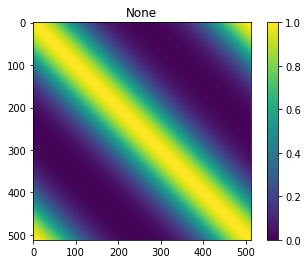

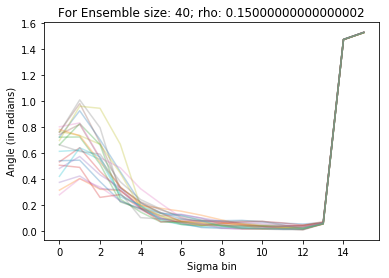

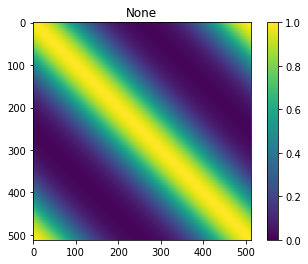

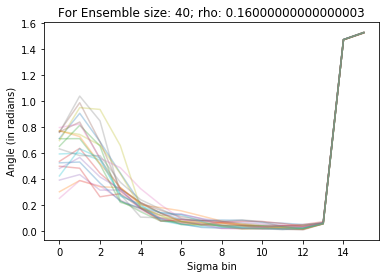

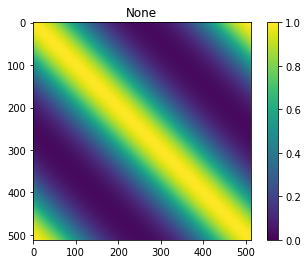

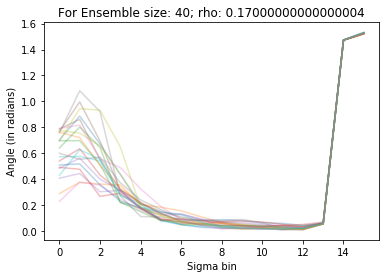

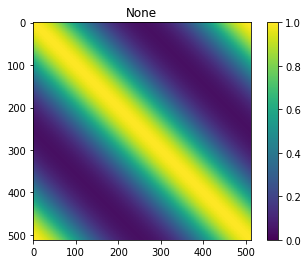

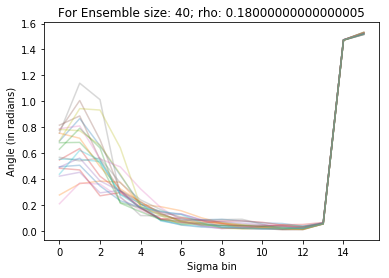

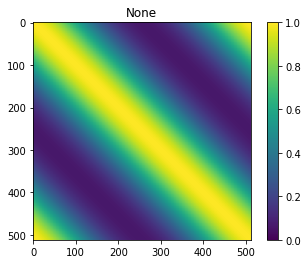

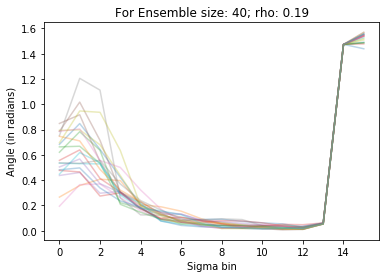

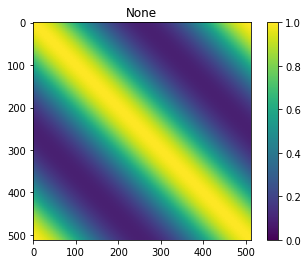

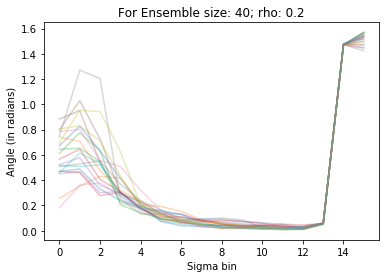

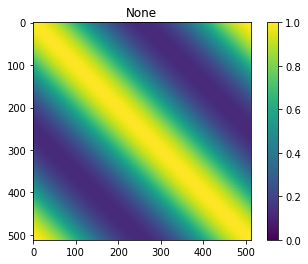

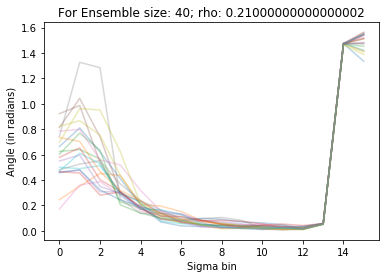

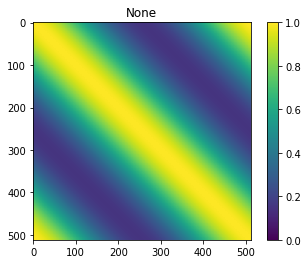

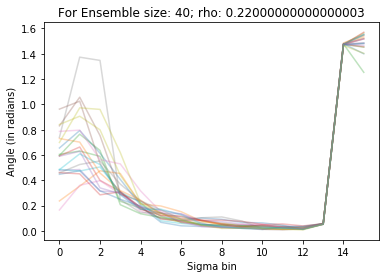

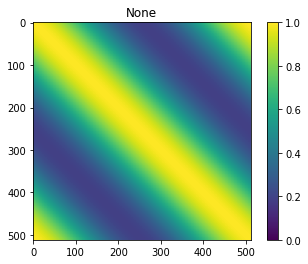

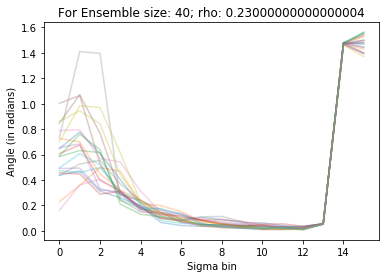

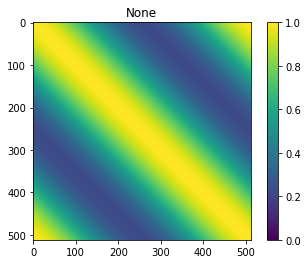

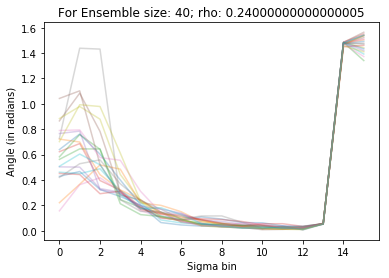

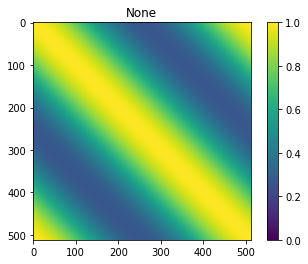

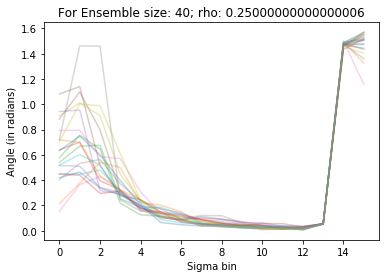

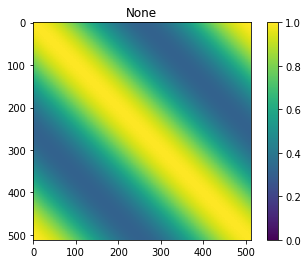

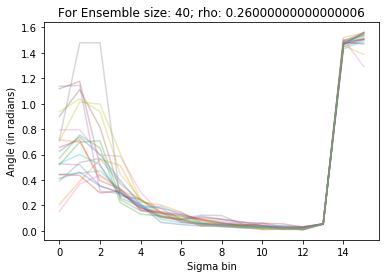

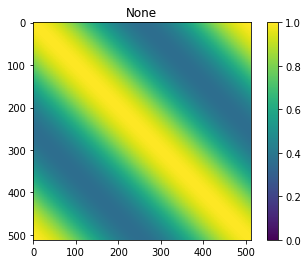

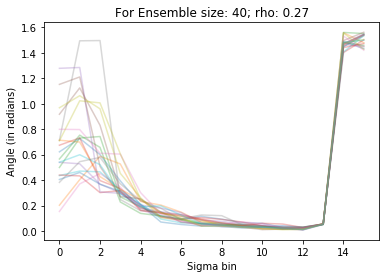

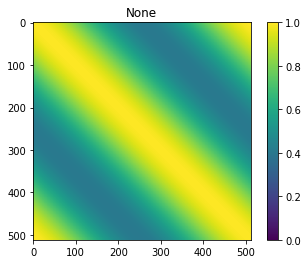

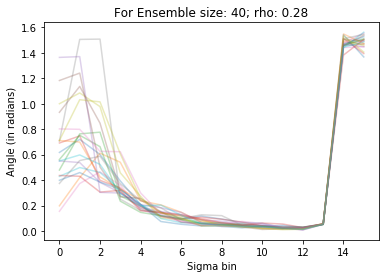

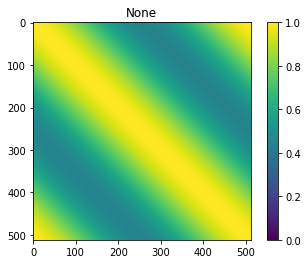

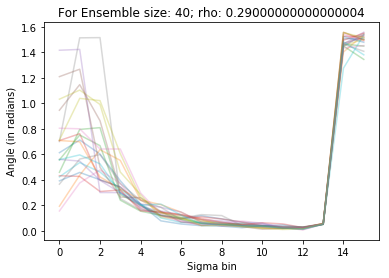

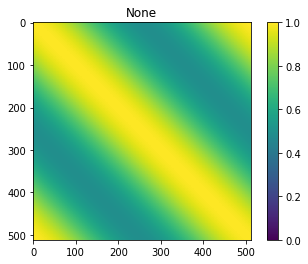

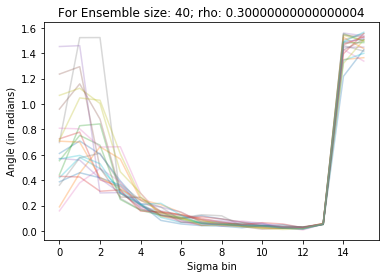

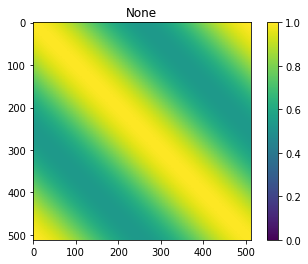

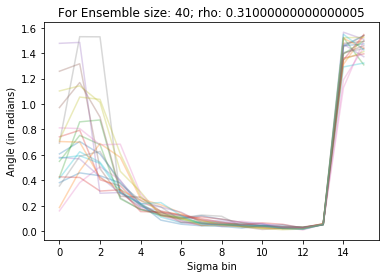

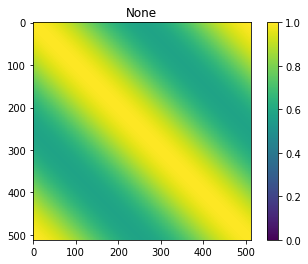

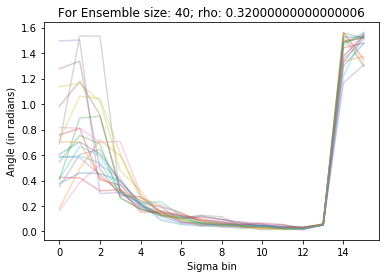

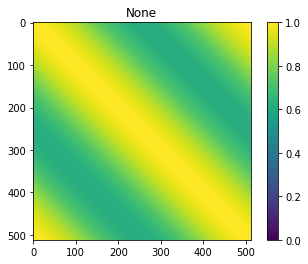

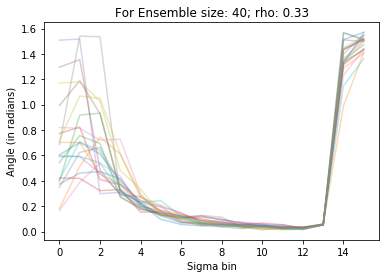

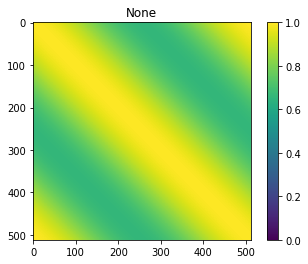

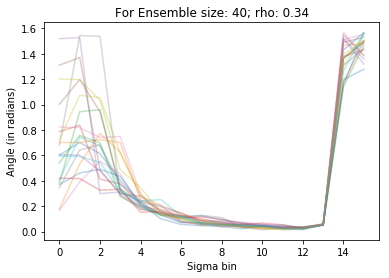

In [119]:
rho_array = np.arange(0.05, 0.35, .01)
for rho_loc in rho_array:
    sig_array = np.concatenate(
        [[1], np.repeat([2], 15)])
    total_sig = sig_array.sum()
    s_array = np.ones([total_sig, ens_ens_size]) * np.nan
    U_array = np.ones([obs_size, total_sig, ens_ens_size]) * np.nan
    V_array = np.ones([dimension, total_sig, ens_ens_size]) * np.nan

    [loc] = covariance.generate_circulant(
        dimension, dx, rho_loc, covariance.fft_sqd_exp_1d,
        return_Corr=True, return_eig=False)
    loc /= loc.max()
    imshow(loc, vmin=0)

    for ens_count in range(ens_ens_size):
        this_trans_mats = assimilate.transformation_matrices(
            H, P=P_sample_array[:, :, ens_count] * loc,
            R=R)

        aU = this_trans_mats['U']
        aS = this_trans_mats['S']
        aVT = this_trans_mats['VT']

        U_array[:, :total_sig, ens_count] = aU[:, :total_sig]
        s_array[:total_sig, ens_count] = aS.diagonal()[:total_sig]
        V_array[:, :total_sig, ens_count] = aVT[:total_sig, :].T

    angle_array = np.ones([sig_array.size, ens_ens_size]) * np.nan
    last_sig = 0
    for sig_count, sig_num in enumerate(sig_array):
        sig_slice = slice(last_sig, last_sig + sig_num)
        last_sig = last_sig + sig_num
        true_V = VT[sig_slice].T

        comb_count = 0
        for ens_count in range(ens_ens_size):
            aV = V_array[:, sig_slice, ens_count]
            angle_array[sig_count, ens_count] = angle(aV, true_V)

    plt.figure()
    plt.plot(angle_array, alpha=0.3)
    plt.xlabel('Sigma bin')
    plt.ylabel('Angle (in radians)')
    plt.title(f'For Ensemble size: {ens_size}; rho: {rho_loc}')